# Newton Raphson solver in pure Python, plus some other introductory notes

1. An overview of the paradigm of Python and how to use help tools
2. Overview of editors and integrated developer environments
3. Basic math usage
4. Matrix computations
5. File i/o
6. Graphs and plots
7. Numerical methods
8. Optimization 

## Overview
1. Python programs can be be written as object oriented or imperative. 
2. Python uses *duck typing* for variables. If it looks like a duck, and it acts like a duck, then it is a duck. A float is a float, a string is a string without the variable having to be predefined
3. It is a more formal language than Matlab. For instance: `f(2)`, is that the second element of a vector `f` or are you sending 2 to a function named `f`?
4. Codes can be, and for some are commonly, executed from a terminal, natively: In Unix/Linux/MacOS, starting a python code file with `#! /usr/bin/env python` or the appropriate path and changing the permissions allows the code to be executed as a terminal command itself. 
5. No end statements. This is weird to new users. Formatting, specifically indenting, defines the level within loops and conditional statements. This is frustrating if you are sloppy in formating but results in much more readable code. 
6. 0-indexing. We start counting at zero, just like for time, unlike matrices. This is common to the vast majority of modern computer languages- specifically not Matlab and not Fortran. 

### The Zen of Python PEP 20
* Beautiful is better than ugly.
* Explicit is better than implicit.
* Simple is better than complex.
* Complex is better than complicated.
* Flat is better than nested.
* Sparse is better than dense.
* Readability counts.
* Special cases aren't special enough to break the rules.
* Although practicality beats purity.
* Errors should never pass silently.
* Unless explicitly silenced.
* In the face of ambiguity, refuse the temptation to guess.
* There should be one-- and preferably only one --obvious way to do it.
* Although that way may not be obvious at first unless you're Dutch.
* Now is better than never.
* Although never is often better than *right* now.
* If the implementation is hard to explain, it's a bad idea.
* If the implementation is easy to explain, it may be a good idea.
* Namespaces are one honking great idea -- let's do more of those!

## Python Editors and Integrated Development Environments

Python has a substantial number of standards for how to write and document code.

These seem very restrictive, but most are not enforced. They are recommendations (requirements for submitting to the code-base, though). 

These standards result in beautiful and readable code and actually make documenting your code fun. 

A good editor helps:
1. Spyder: A Matlab-style IDE best for scientific usage of Python writing longer codes. 
2. Jupyter: A Mathamatica-like notebook better for using, or dabbling in Python, or for making usable notes and reports demonstrating usage. 
3. PyCharm: An IDE that is likely the best for non-scientific usage of Python. Certainly worth using to clean up errors/formatting of code. Better editor than Spyder. 
4. Atom: GitHub's editor. With add-ins it is a powerful IDE itself. I tend to use it simultaneously with Jupyter when developing code (Atom is multi-language. I like having a single editor I'm good with).
5. Emacs: Very powerful editor. Love it or hate it. I don't use it as much as I once did, but may try it again. 
6. VI/VIM: Very powerful editor. Love it or hate it. I hate it. Some very smart people love it. The problem is with me and not the editor. 

## Basic math and arrays

First we need to import a few libraries that we will need. 

The first line is specific to using Python in the Jupyter environment. It defines how and where to put plots. 

The second two lines load the packages we will wish to use. They are comparable to Matlab toolboxes. In computational usage of Python, you almost **always** use these two, perhaps additional libraries as well. 

In [1]:
# This is not a comment. This isn't Matlab. 
# Special to Jupyter are `magics` which start with a %. More later. 
# %matplotlib inline  
"""Comment the previous line and uncomment the following one to 
have a GUI for your plot. Note that you will restart the kernel 
for this to work.""" 
# %matplotlib qt5 
import matplotlib.pyplot as plt
import numpy as np

We could have used `from numpy import *`, but this dumps every function within Numpy into our namespace. If we want to use that name elsewhere, we no longer can. By importing like this we are managing the namespace so that all functions in Numpy can be accessed with `np.function_name`. `np` is a convention short hand that is commonly used, but we could have used `import numpy` (functions are called with `numpy.function_name`) or `import numpy as pickles` (functions in Numpy are access with `pickles.function_name`. 

Let's get a list of functions that Numpy provides by using the `dir` command. 

In [2]:
dir(np) 

['ALLOW_THREADS',
 'AxisError',
 'BUFSIZE',
 'CLIP',
 'ComplexWarning',
 'DataSource',
 'ERR_CALL',
 'ERR_DEFAULT',
 'ERR_IGNORE',
 'ERR_LOG',
 'ERR_PRINT',
 'ERR_RAISE',
 'ERR_WARN',
 'FLOATING_POINT_SUPPORT',
 'FPE_DIVIDEBYZERO',
 'FPE_INVALID',
 'FPE_OVERFLOW',
 'FPE_UNDERFLOW',
 'False_',
 'Inf',
 'Infinity',
 'MAXDIMS',
 'MAY_SHARE_BOUNDS',
 'MAY_SHARE_EXACT',
 'MachAr',
 'ModuleDeprecationWarning',
 'NAN',
 'NINF',
 'NZERO',
 'NaN',
 'PINF',
 'PZERO',
 'PackageLoader',
 'RAISE',
 'RankWarning',
 'SHIFT_DIVIDEBYZERO',
 'SHIFT_INVALID',
 'SHIFT_OVERFLOW',
 'SHIFT_UNDERFLOW',
 'ScalarType',
 'Tester',
 'TooHardError',
 'True_',
 'UFUNC_BUFSIZE_DEFAULT',
 'UFUNC_PYVALS_NAME',
 'VisibleDeprecationWarning',
 'WRAP',
 '_NoValue',
 '__NUMPY_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__config__',
 '__doc__',
 '__file__',
 '__git_revision__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_distributor_init',
 '_globals',
 '_import_tools

Note that base Python has only 23 functions! Any others need to be imported to be used. This speeds up the load time of Python and keeps your name space clean. 

In [3]:
a = np.cos(np.pi)
a # will be printed as a default in Jupyter

-1.0

Python has the normal infix operators for addition, subtraction, etc. For exponentiation, is uses `**` unlike Matlab's or LaTeX's `^`.

In [4]:
# To make an array, we use the Numpy array function
a = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 9]])
c = np.array([[1], [2], [3]])
print(a)
print(c)

[[0 1 2]
 [3 4 5]
 [6 7 9]]
[[1]
 [2]
 [3]]


Linear algebra tools reside in the `numpy.linalg` package

In [5]:
import numpy.linalg as la

In [6]:
b = la.solve(a, c)
b

array([[-0.66666667],
       [ 1.        ],
       [-0.        ]])

Python's infix operators presume element by element operations, not linear algebra operations, so be careful. It's backwards from Matlab. 

In [7]:
print(a)
print(a*a)


[[0 1 2]
 [3 4 5]
 [6 7 9]]
[[ 0  1  4]
 [ 9 16 25]
 [36 49 81]]


The linear algebra operation is `@` for multiplication. 

In [8]:
a@a

array([[ 15,  18,  23],
       [ 42,  54,  71],
       [ 75,  97, 128]])

We can append matrices

In [9]:
np.vstack((a, a))

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 9],
       [0, 1, 2],
       [3, 4, 5],
       [6, 7, 9]])

The construct (a, a) is a `tuple`, which is a non-mutable list. 

We can pull out slices. This is a very long topic, and Python has some great tricks to learn. 

In [10]:
np.vstack((a, a))[0:3,:]

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 9]])

In [11]:
np.vstack((a, a))[(0,1,2),:]

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 9]])

Note: 
1. We can index any object, including a result, using the square brackets. 
2. We can use `:` as a through statement
3. The first index is inclusive, the last is exclusive. 

In [12]:
np.vstack((a, a))[1::,:] # through the end. 

array([[3, 4, 5],
       [6, 7, 9],
       [0, 1, 2],
       [3, 4, 5],
       [6, 7, 9]])

In [13]:
np.vstack((a, a))[0:6:2,:] # by steps of 2.

array([[0, 1, 2],
       [6, 7, 9],
       [3, 4, 5]])

Numpy has numerous other stacking tools. 

In [14]:
a[2, :] = np.array([[0,0,0]])
a

array([[0, 1, 2],
       [3, 4, 5],
       [0, 0, 0]])

# File IO
Let's write this to a file. 


In [15]:
f = open('my_filename.txt','w')
f.write(str(a))
f.close()

In [16]:
f = open('my_filename.txt', 'r')
aa = f.read()
aa

'[[0 1 2]\n [3 4 5]\n [0 0 0]]'

This is a problem, it's now a string! `\n` is the newline character.

In [17]:
print(aa)

[[0 1 2]
 [3 4 5]
 [0 0 0]]


In [18]:
aa2 = aa.replace('\n ',',').replace(' ',',')
aa2

'[[0,1,2],[3,4,5],[0,0,0]]'

In [19]:
aa2 = np.array(eval(aa2))
aa2

array([[0, 1, 2],
       [3, 4, 5],
       [0, 0, 0]])

That was harder than it should have been. How about seeing if there is a function in Numpy to do this. Yes! It's `savez`.

In [20]:
np.savez('my_filename2', a=a, b=b) # The second variable name is the 
#                                    name it will be given in the file

In [21]:
a = b = 0
print(a, b)

0 0


In [22]:
mydata = np.load('my_filename2.npz')
print(mydata['a'])
print(mydata['b'])

[[0 1 2]
 [3 4 5]
 [0 0 0]]
[[-0.66666667]
 [ 1.        ]
 [-0.        ]]


Alternatively, let's use the Matlab format!

In [23]:
import scipy.io as sio
sio.savemat('my_filename3', {'a':mydata['a'], 'b':mydata['b']}) # a and b are still 0!
loaded_variables = sio.loadmat('my_filename3.mat')
loaded_variables

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Fri Jul 21 21:38:28 2017',
 '__version__': '1.0',
 'a': array([[0, 1, 2],
        [3, 4, 5],
        [0, 0, 0]]),
 'b': array([[-0.66666667],
        [ 1.        ],
        [-0.        ]])}

In [24]:
loaded_variables['a']

array([[0, 1, 2],
       [3, 4, 5],
       [0, 0, 0]])

# Numerical Methods and Plotting

The following line imports (loads) some functions from the file
``newton_raphson.py``. It should be easy to understand which ones. 
Loading them one at a time make sense when there is one or two.
When their are more, you can use
``import newton_raphson as nr`` and *all* functions will be loaded
with names in the ``nr`` name subspace. That is, you would call the function ``newton_raphson`` as ``np.newton_raphson``. This keeps your name space from clashing and getting swamped with potentially conflicting names. 

In [25]:
# See ``newton_raphson.py`` for the content of these functions. 
from newton_raphson import newton_raphson_plot
from newton_raphson import myfunc
function_name = 'myfunc'
newton_raphson_plot(function_name,6)
plt.savefig('Newton_Raphson_Solution.svg')  # There is now a file in Scaled Vector Format saved

If you really want to understand the Jupyter *magics* uncomment the next line. (remove the '#')

In [26]:
%magic

In [27]:
# The last line in a cell dumps all output to the page. Here we get the answer (1.236)!
newton_raphson_plot(function_name, x0=5)

(1.2360679774997896, -7.81975583743945e-11)

In [28]:
newton_raphson_plot(function_name, x0=4)
## For higher quality inline plots, uncomment below. 
#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('pdf', 'svg')

(1.2360679775000651, -9.171621755329502e-07)

So, how is this done? Let's start by defining a *function*, or *subroutine*, etc.

In [29]:
def myfunc(x):
#    print('I love Python')
    return x**2+2*x-4

In [30]:
myfunc(3)

11

In [31]:
a = myfunc(4)
print(a)

20


The word *def* takes the place of *function* in Matlab. The colon, ":", ends the line. All other lines are indented a single level. [Standard](https://www.python.org/dev/peps/pep-0008/) formating defined this as 4 spaces. 

* Most editors will move to four spaces is you use the *Tab* key. 
* [Standard](https://www.python.org/dev/peps/pep-0008/) for formatting are considered a big deal. 
    * You won't remember them.
    * A good editor (Spyder, PyCharm, Atom) will remember them.
    * They substantially enhance readability.
    * Many editors will make this happen for you automatically on save. 

In [32]:
function_name = 'myfunc'

Plots are done similarly to Matlab. 
* We optioned here, for our sanity, to control the *name space*
* The name *ylabel* **can still be used as a variable**!

In [33]:
ylabel = 4
ylabel

4

In [34]:
help(np.linspace)

Help on function linspace in module numpy.core.function_base:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    Parameters
    ----------
    start : scalar
        The starting value of the sequence.
    stop : scalar
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, so that `stop` is excluded.  Note that the step
        size changes when `endpoint` is False.
    num : int, optional
        Number of samples to generate. Default is 50. Must be non-negative.
    endpoint : bool, optional
        If True, `stop` is the last sample. Otherwise, it is not included.
        Default is True.
    retstep : bo

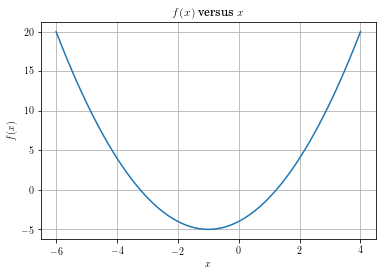

In [35]:
%matplotlib inline
x = np.linspace(start = -6, stop= 4, num = 200)
#x = sp.linspace(start=-6, stop=10,num=200)
plt.plot(x,myfunc(x))

plt.grid('on')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.title('$f(x)$ versus $x$')
plt.show()
# To save a plot
plt.savefig('myplot.pdf')

In [36]:
def newton_raphson(function, x0 = 0, dx = 1e-10, eps = 1e-10, count = 0):
    deltax = 2*eps
    x = x0
    # loop until it converges, but no more than 50 times
    while abs(deltax) > eps and count < 50: 
        count += 1 # I can add 1 to the variable *count*. Neat Python shortcut. 
        # This is a comment
        # The next line is "Matlab style" and *bad*
        #f = eval(function + '('+ str(x) + ')')
        f = globals()[function](x)  #We explain later. 
        #f2 = eval(function + '('+ str(x+dx) + ')')
        f2 = globals()[function](x+dx)
        # Calculate the slope (estimation of derivative. )
        dfdx = (f2-f)/dx
        # Straight line approximation of delta x to intercept y=0. 
        deltax = -f/dfdx
        # New estimate of x. 
        x = x + deltax
    return x, deltax, count                

In [37]:
newton_raphson(function_name, x0=2)

(1.2360679774997898, -2.7585905568420595e-13, 5)

In [38]:
(x_soln, final_delta_x, num_steps) = newton_raphson(function_name, x0=2)

In [39]:
print(x_soln)
print(final_delta_x)
print(num_steps)

1.2360679774997898
-2.7585905568420595e-13
5


Outputs and unpacking of results

In [40]:
a = newton_raphson(function_name, x0=2)
a

(1.2360679774997898, -2.7585905568420595e-13, 5)

In [41]:
a[0]

1.2360679774997898

In [42]:
a1,a2,a3=a
a1

1.2360679774997898

In [43]:
%%timeit #just clocking this
newton_raphson(function_name, x0=2)

6.31 µs ± 178 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [44]:
# less efficient- using the eval statement
def newton_raphson_eval(function, x0 = 0, dx = 1e-10, eps = 1e-10):
    deltax = 2*eps
    count = 0
    x = x0
    while abs(deltax) > eps and count < 50:
        count += 1
        f = eval(function + '('+ str(x) + ')')
        #f = globals()[function](x)
        f2 = eval(function + '('+ str(x+dx) + ')')
        #f2 = globals()[function](x+dx)
        dfdx = (f2-f)/dx
        deltax = -f/dfdx
        x = x + deltax
    return x, deltax

In [45]:
%%timeit
newton_raphson_eval(function_name, x0=2)

124 µs ± 4.3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


One of the neat things about Python is that a function itself can be assigned to a variable. When we to that, the variable acts just like the function. In the following the  polynomial function ``myfunc`` defined above is assigned to the variable ``function`` to perform the search. It runs faster yet. 

In [46]:
def newton_raphson_variable(function, x0 = 0, dx = 1e-10, eps = 1e-10, count = 0):
    deltax = 2*eps
    x = x0
    # loop until it converges, but no more than 50 times
    while abs(deltax) > eps and count < 50: 
        count += 1  
        f = function(x)  # Note that function is a variable containing the actual function
        # It acts like the function itself. 
        f2 = function(x+dx)
        dfdx = (f2-f)/dx # Calculate the slope (estimation of derivative. )
        deltax = -f/dfdx # Straight line approximation of delta x to intercept y=0. 
        x = x + deltax # New estimate of x.
    return x, deltax, count 

In [47]:
%%timeit
newton_raphson_variable(myfunc, x0=2)

5.4 µs ± 70 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [48]:
import scipy.optimize

In [49]:
%%timeit
scipy.optimize.broyden1(globals()[function_name], 2, f_tol=1e-14)

2.14 ms ± 320 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [50]:
%%timeit
scipy.optimize.broyden2(globals()[function_name], 2, f_tol=1e-14)

1.9 ms ± 213 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [51]:
%%timeit
scipy.optimize.root(globals()[function_name], 2)

79.3 µs ± 6.26 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [52]:
%%timeit
scipy.optimize.fsolve(globals()[function_name], 2)

77.3 µs ± 5.77 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


My code is faster. How? Well, the other codes are optimized for very large problems. Mine is optimized for small problems. 

[Formatted printing](https://mkaz.tech/code/python-string-format.html) can be performed using the *.format* operator. 

In [53]:
print(np.pi)
print('{:.2f}'.format(np.pi))
print('{:.4f}'.format(np.pi))
print('{:^12.2f}'.format(np.pi))

3.141592653589793
3.14
3.1416
    3.14    


In [54]:
from ipywidgets import interact# , interactive, fixed, interact_manual
#import ipywidgets as widgets

In [72]:
def sdof_resp(x0=1, v0=0.1, m=1, c=.1, k=10, tmax=10):
    t = np.linspace(0, tmax, 200)
    omega = np.sqrt(k / m)
    zeta = c / 2 / np.sqrt(m * k)
    if zeta < 1:
        omega_d = omega * np.sqrt(1 - zeta**2)
        X0 = np.sqrt(x0**2 * omega**2 + v0**2 + 2 * x0 * v0 * zeta *
                     omega) / omega_d
        Phi0 = np.arctan2(x0 * omega_d, (v0 + zeta * omega * x0))
        x = X0 * np.exp(-zeta * omega * t) * np.sin(omega_d * t + Phi0)
    else:
        print(zeta)
        C1 = (x0 * omega * (zeta + np.sqrt(zeta**2 - 1)) + v0
              ) / 2 / omega / np.sqrt(zeta**2 - 1)
        C2 = (-x0 * omega * (zeta - np.sqrt(zeta**2 - 1)) - v0
              ) / 2 / omega / np.sqrt(zeta**2 - 1)
        x = C1 * np.exp(
            (-zeta + np.sqrt(zeta**2 - 1)) * omega * t) + C2 * np.exp(
                (-zeta - np.sqrt(zeta**2 - 1)) * omega * t)
    plt.plot(t, np.real(x))
    plt.xlabel('$t$ (sec)')
    plt.ylabel('$x(t)$ (m)')
    plt.title('x versus time. $\\zeta = ${:.2f}'.format(zeta))
    plt.show()

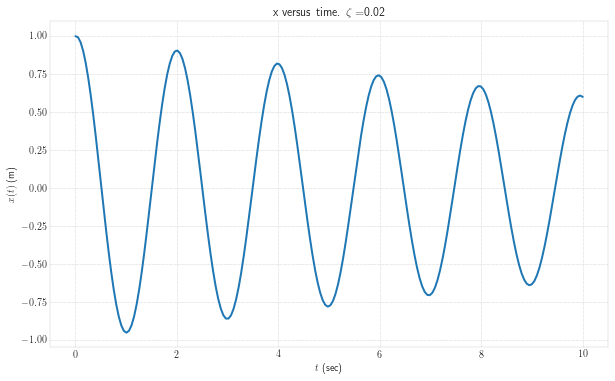

In [73]:
sdof_resp(1,0.1,1,.1,10,10)

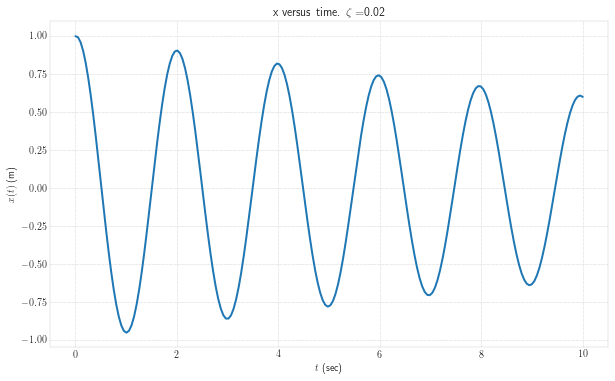

In [74]:
sdof_resp()  # arguments aren't necessary to use the defaults.

In [75]:
interact(sdof_resp, x0 = (0,2,0.1), v0 = (0,2,.1), m = (0,2,0.1), k = (0,100,1), c = (-1,5,.1));

In [76]:
globals()['a']

(1.2360679774997898, -2.7585905568420595e-13, 5)

In [77]:
mydict = {'ham':'$2','bacon':'$3'}

In [78]:
mydict['ham']

'$2'

In [79]:
help('modules')


Please wait a moment while I gather a list of all available modules...



/Users/jslater/anaconda/lib/python3.6/site-packages/pyqtgraph/canvas/CanvasTemplate_pyqt.py:10: RuntimeWarning:

Loaded module AnyQt._backport as a substitute for PyQt4



AnyQt               brain_six           jupyter_highlight_selected_word reprlib
Crypto              brain_ssl           jupyter_nbextensions_configurator requests
Cython              brain_subprocess    jupyter_sphinx      requests_toolbelt
IPython             brain_threading     jupyterlab          resource
OleFileIO_PL        brain_typing        jupyterlab_launcher rise
OpenSSL             bs4                 keyring             rlcompleter
Orange              builtins            keyword             rmagic
PIL                 bz2                 latex_envs          rope
PyQt5               cProfile            lazy_object_proxy   rpyc
__future__          calendar            lib2to3             ruamel_yaml
_ast                certifi             libfuturize         runpy
_asyncio            cffi                libpasteurize       s3fs
_bisect             cgen                linecache           s3transfer
_blake2             cgi                 llvmlite            sched
_bootlocale     

In [80]:
dir(scipy.optimize)

['LbfgsInvHessProduct',
 'OptimizeResult',
 'OptimizeWarning',
 'Tester',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_basinhopping',
 '_cobyla',
 '_differentialevolution',
 '_group_columns',
 '_hungarian',
 '_lbfgsb',
 '_linprog',
 '_lsq',
 '_minimize',
 '_minpack',
 '_nnls',
 '_numdiff',
 '_root',
 '_slsqp',
 '_spectral',
 '_trustregion',
 '_trustregion_dogleg',
 '_trustregion_ncg',
 '_zeros',
 'absolute_import',
 'anderson',
 'approx_fprime',
 'basinhopping',
 'bisect',
 'bracket',
 'brent',
 'brenth',
 'brentq',
 'broyden1',
 'broyden2',
 'brute',
 'check_grad',
 'cobyla',
 'curve_fit',
 'diagbroyden',
 'differential_evolution',
 'division',
 'excitingmixing',
 'fixed_point',
 'fmin',
 'fmin_bfgs',
 'fmin_cg',
 'fmin_cobyla',
 'fmin_l_bfgs_b',
 'fmin_ncg',
 'fmin_powell',
 'fmin_slsqp',
 'fmin_tnc',
 'fminbound',
 'fsolve',
 'golden',
 'lbfgsb',
 'least_squares',
 'leastsq',
 'line_sear

In [81]:
help(scipy.optimize.root)

Help on function root in module scipy.optimize._root:

root(fun, x0, args=(), method='hybr', jac=None, tol=None, callback=None, options=None)
    Find a root of a vector function.
    
    Parameters
    ----------
    fun : callable
        A vector function to find a root of.
    x0 : ndarray
        Initial guess.
    args : tuple, optional
        Extra arguments passed to the objective function and its Jacobian.
    method : str, optional
        Type of solver.  Should be one of
    
            - 'hybr'             :ref:`(see here) <optimize.root-hybr>`
            - 'lm'               :ref:`(see here) <optimize.root-lm>`
            - 'broyden1'         :ref:`(see here) <optimize.root-broyden1>`
            - 'broyden2'         :ref:`(see here) <optimize.root-broyden2>`
            - 'anderson'         :ref:`(see here) <optimize.root-anderson>`
            - 'linearmixing'     :ref:`(see here) <optimize.root-linearmixing>`
            - 'diagbroyden'      :ref:`(see here) <opti

In [82]:
import pandas as pd

In [83]:
help(pd.read_excel)

Help on function read_excel in module pandas.io.excel:

read_excel(io, sheetname=0, header=0, skiprows=None, skip_footer=0, index_col=None, names=None, parse_cols=None, parse_dates=False, date_parser=None, na_values=None, thousands=None, convert_float=True, has_index_names=None, converters=None, dtype=None, true_values=None, false_values=None, engine=None, squeeze=False, **kwds)
    Read an Excel table into a pandas DataFrame
    
    Parameters
    ----------
    io : string, path object (pathlib.Path or py._path.local.LocalPath),
        file-like object, pandas ExcelFile, or xlrd workbook.
        The string could be a URL. Valid URL schemes include http, ftp, s3,
        and file. For file URLs, a host is expected. For instance, a local
        file could be file://localhost/path/to/workbook.xlsx
    sheetname : string, int, mixed list of strings/ints, or None, default 0
    
        Strings are used for sheet names, Integers are used in zero-indexed
        sheet positions.
    
 

In [84]:
df = pd.read_excel('Financial_Sample.xlsx')

In [85]:
df

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3,20,32370.0,0.00,32370.00,16185.0,16185.00,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3,20,26420.0,0.00,26420.00,13210.0,13210.00,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3,15,32670.0,0.00,32670.00,21780.0,10890.00,2014-06-01,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3,15,13320.0,0.00,13320.00,8880.0,4440.00,2014-06-01,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3,15,37050.0,0.00,37050.00,24700.0,12350.00,2014-06-01,6,June,2014
5,Government,Germany,Carretera,None,1513.0,3,350,529550.0,0.00,529550.00,393380.0,136170.00,2014-12-01,12,December,2014
6,Midmarket,Germany,Montana,None,921.0,5,15,13815.0,0.00,13815.00,9210.0,4605.00,2014-03-01,3,March,2014
7,Channel Partners,Canada,Montana,None,2518.0,5,12,30216.0,0.00,30216.00,7554.0,22662.00,2014-06-01,6,June,2014
8,Government,France,Montana,None,1899.0,5,20,37980.0,0.00,37980.00,18990.0,18990.00,2014-06-01,6,June,2014
9,Channel Partners,Germany,Montana,None,1545.0,5,12,18540.0,0.00,18540.00,4635.0,13905.00,2014-06-01,6,June,2014


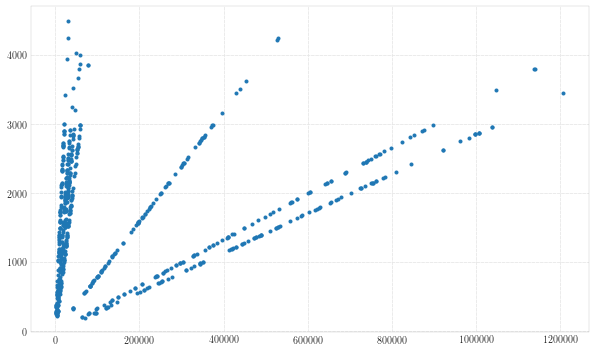

In [86]:
plt.plot(df['Gross Sales'],df['Units Sold'],'.')

In [87]:
df[['Gross Sales','Units Sold']].iloc[[0,2],[0,1]]

,Gross Sales,Units Sold
0,32370.0,1618.5
2,32670.0,2178.0


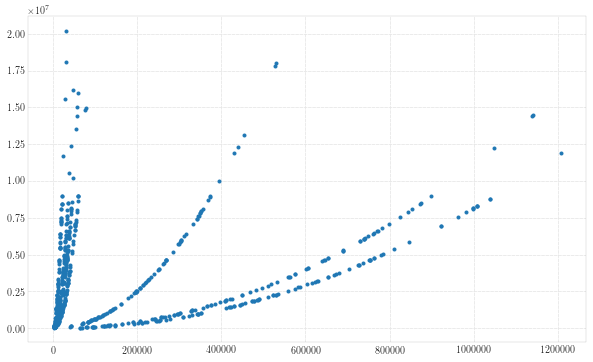

In [88]:
plt.plot(df['Gross Sales'],df['Units Sold']**2,'.')